In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

In [59]:
customer_aqusition = pd.read_excel('Credit Card Data.xlsx',sheet_name = 'Customer Acqusition' )

repayment = pd.read_excel('Credit Card Data.xlsx',sheet_name = 'Repayment' )

spend = pd.read_excel('Credit Card Data.xlsx',sheet_name = 'Spend' )

#### Exploratory Data Analysis

In [3]:
customer_aqusition.isna().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [4]:
customer_aqusition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Age       100 non-null    float64
 3   City      100 non-null    object 
 4   Product   100 non-null    object 
 5   Limit     100 non-null    int64  
 6   Company   100 non-null    object 
 7   Segment   100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [5]:
customer_aqusition.shape

(100, 8)

In [6]:
repayment.isna().sum()

SL No:      0
Customer    0
Month       0
Amount      0
dtype: int64

In [7]:
repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   SL No:    1500 non-null   int64         
 1   Customer  1500 non-null   object        
 2   Month     1500 non-null   datetime64[ns]
 3   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 47.0+ KB


In [8]:
repayment.shape

(1500, 4)

In [9]:
spend.isna().sum()

Sl No:      0
Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [10]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Sl No:    1500 non-null   int64         
 1   Customer  1500 non-null   object        
 2   Month     1500 non-null   datetime64[ns]
 3   Type      1500 non-null   object        
 4   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 58.7+ KB


In [11]:
spend.shape

(1500, 5)

### Merge spend data with  customer_aqusition data as Semi_final_data

In [60]:
semi_final_data = pd.merge(left = spend,right = customer_aqusition, left_on = 'Customer',right_on = 'Customer',how = 'left')
semi_final_data.head(2)

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment
0,1,A1,2004-01-12,JEWELLERY,344054.980813,1,31.732105,BANGALORE,Gold,500000,C1,Self Employed
1,2,A1,2004-01-03,PETRO,467747.601626,1,31.732105,BANGALORE,Gold,500000,C1,Self Employed


### Merge Semi_final_data with repayment data as final_data

In [62]:
final_data = pd.merge(left = semi_final_data,right = repayment,left_on = ['Sl No:','Customer'],right_on=['SL No:','Customer'],how = 'inner',suffixes=('_Spend','_Repayment'))
final_data.head(2)

,Sl No:,Customer,Month_Spend,Type,Amount_Spend,No,Age,City,Product,Limit,Company,Segment,SL No:,Month_Repayment,Amount_Repayment
0,1,A1,2004-01-12,JEWELLERY,344054.980813,1,31.732105,BANGALORE,Gold,500000,C1,Self Employed,1,2004-01-12,338932.141919
1,2,A1,2004-01-03,PETRO,467747.601626,1,31.732105,BANGALORE,Gold,500000,C1,Self Employed,2,2004-01-03,131778.688758


## 1. In the above dataset

### a. In case age is less than 18, replace it with mean of age values

In [63]:
customer_aqusition[customer_aqusition.Age < 18] = customer_aqusition.Age.mean()

### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card) 

In [64]:
semi_final_data['Amount'] = pd.Series(np.where(semi_final_data.Amount > semi_final_data.Limit,semi_final_data.Limit/2,semi_final_data.Amount))
semi_final_data

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment
0,1,A1,2004-01-12,JEWELLERY,344054.980813,1,31.732105,BANGALORE,Gold,500000,C1,Self Employed
1,2,A1,2004-01-03,PETRO,467747.601626,1,31.732105,BANGALORE,Gold,500000,C1,Self Employed
2,3,A1,2004-01-15,CLOTHES,86878.954735,1,31.732105,BANGALORE,Gold,500000,C1,Self Employed
3,4,A1,2004-01-25,FOOD,269175.011875,1,31.732105,BANGALORE,Gold,500000,C1,Self Employed
4,5,A1,2005-01-17,CAMERA,3406.639477,1,31.732105,BANGALORE,Gold,500000,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,A67,2006-02-04,BUS TICKET,418316.710886,67,28.540941,CHENNAI,Gold,500000,C29,Normal Salary
1496,1497,A68,2006-03-25,BUS TICKET,50000.000000,68,29.983443,TRIVANDRUM,Silver,100000,C30,Self Employed
1497,1498,A69,2006-03-31,BUS TICKET,5000.000000,69,23.187436,CALCUTTA,Platimum,10000,C31,Self Employed
1498,1499,A70,2006-03-23,BUS TICKET,5000.500000,70,65.625571,BOMBAY,Platimum,10001,C32,Self Employed


### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [65]:
final_data['Amount_Repayment'] = pd.Series(np.where(final_data.Amount_Repayment > final_data.Limit,final_data.Limit,final_data.Amount_Repayment))

## 2. From the above dataset create the following summaries:

### a. How many distinct customers exist?

In [66]:
final_data.drop_duplicates(subset = ['Customer'],keep = 'first')

,Sl No:,Customer,Month_Spend,Type,Amount_Spend,No,Age,City,Product,Limit,Company,Segment,SL No:,Month_Repayment,Amount_Repayment
0,1,A1,2004-01-12,JEWELLERY,344054.980813,1,31.732105,BANGALORE,Gold,500000,C1,Self Employed,1,2004-01-12,338932.141919
7,8,A8,2004-02-05,BIKE,222235.993936,8,44.173800,PATNA,Silver,100002,C8,Salaried_Pvt,8,2004-02-05,100002.000000
8,9,A9,2005-02-28,AUTO,205127.443506,9,54.899899,CHENNAI,Silver,100003,C9,Govt,9,2005-02-28,100003.000000
9,10,A10,2005-02-16,SHOPPING,247718.147089,10,16.125533,CALCUTTA,Gold,500000,C10,Normal Salary,10,2005-02-16,210273.388982
10,11,A11,2005-02-23,AIR TICKET,195424.058828,11,38.859683,COCHIN,Gold,500000,C11,Normal Salary,11,2005-02-23,223511.547743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,105,A3,2004-01-15,MOVIE TICKET,96654.230207,3,54.589008,COCHIN,Platimum,10000,C3,Salaried_Pvt,105,2004-01-15,10000.000000
105,106,A4,2004-01-25,JEWELLERY,403905.864530,4,79.880295,BOMBAY,Platimum,10001,C4,Govt,106,2004-01-25,10001.000000
106,107,A5,2004-01-12,PETRO,205734.465104,5,29.957442,BANGALORE,Platimum,10002,C5,Normal Salary,107,2004-01-12,10002.000000
107,108,A6,2004-01-03,CLOTHES,89133.397644,6,27.973516,DELHI,Silver,100000,C6,Self Employed,108,2004-01-03,100000.000000


In [67]:
a = final_data.drop_duplicates(subset = ['Customer'],keep = 'first').shape[0]
print(f"{a} distinct customers are available in the data")

100 distinct customers are available in the data


### b. How many distinct categories exist?

In [68]:
d_cat = final_data.drop_duplicates(subset = ['Segment'],keep= 'first').shape[0]
print(f"{d_cat} distinct customers are available in the data")

5 distinct customers are available in the data


### c. What is the average monthly spend by customers?

First Method : 
    step 1 : Am creating two new columns Months and Years
    step 2 : Create a pivot table using above two columns and calculate the mean of spend Amount

In [69]:
spend['Months'] = spend.Month.dt.strftime("%B")

In [70]:
spend['Years'] = spend.Month.dt.strftime("%Y")

In [75]:
monthly_avg_spend_data  = spend.pivot_table(index = ['Customer','Months'],values = 'Amount',aggfunc='mean').reset_index()

In [76]:
monthly_avg_spend_data 

,Customer,Months,Amount
0,A1,April,459842.299566
1,A1,August,305194.318975
2,A1,February,407517.806604
3,A1,January,246216.555814
4,A1,May,203037.493821
...,...,...,...
573,A95,January,281975.205712
574,A96,January,94369.178802
575,A97,January,134404.666159
576,A98,January,446110.920182


## d. What is the average monthly repayment by customers?

In [77]:
repayment['Months'] = repayment.Month.dt.strftime("%B")

In [78]:
repayment['Years'] = repayment.Month.dt.strftime("%Y")

In [80]:
monthly_avg_repayment_data  = repayment.pivot_table(index = ['Customer','Months'],values = 'Amount',aggfunc='mean').reset_index()

In [81]:
monthly_avg_repayment_data 

,Customer,Months,Amount
0,A1,April,341465.776049
1,A1,February,181723.003932
2,A1,January,277759.921338
3,A1,July,149833.583362
4,A1,November,421565.062460
...,...,...,...
553,A95,January,381370.442582
554,A96,January,462073.813332
555,A97,January,269952.597005
556,A98,January,486616.462801


## e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 
(Profit is defined as interest earned on Monthly Profit. 
 Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)


In [83]:
final_data['Months'] = final_data.Month_Repayment.dt.strftime("%B")

In [84]:
final_data['Years'] = final_data.Month_Repayment.dt.strftime("%Y")

In [144]:
interest_rate_data = final_data.pivot_table(index = ['Customer','Months'],values = ['Amount_Repayment','Amount_Spend'],aggfunc= sum)

In [145]:
interest_rate_data['Profit'] = interest_rate_data.Amount_Repayment - interest_rate_data.Amount_Spend

In [146]:
interest_rate_data['Interest Earned'] = (2.9* interest_rate_data['Profit'])/100

In [147]:
interest_rate_data.reset_index(inplace = True)

In [148]:
interest_rate_data[interest_rate_data.Profit > 0]

,Customer,Months,Amount_Repayment,Amount_Spend,Profit,Interest Earned
0,A1,April,682931.552098,577709.988118,105221.563980,3051.425355
3,A1,July,149833.583362,81814.562390,68019.020972,1972.551608
4,A1,November,843130.124920,464622.717559,378507.407361,10976.714813
5,A1,September,341741.505563,289737.525235,52003.980328,1508.115430
6,A10,April,630349.283842,445010.758482,185338.525360,5374.817235
...,...,...,...,...,...,...
549,A91,April,471238.530147,407569.703098,63668.827049,1846.395984
551,A93,January,491626.294677,164093.690713,327532.603964,9498.445515
552,A94,January,388682.581736,38195.254289,350487.327448,10164.132496
553,A95,January,381370.442582,281975.205712,99395.236870,2882.461869


### f. What are the top 5 product types?

In [90]:
# Top 5 product by Amount spend

a = spend.pivot_table(index = 'Type',values = 'Amount',aggfunc=sum).reset_index().sort_values(by = 'Amount',ascending = False).head(5)
a

,Type,Amount
10,PETRO,5.296209e+07
4,CAMERA,4.271814e+07
7,FOOD,4.131544e+07
0,AIR TICKET,3.743093e+07
14,TRAIN TICKET,3.222431e+07


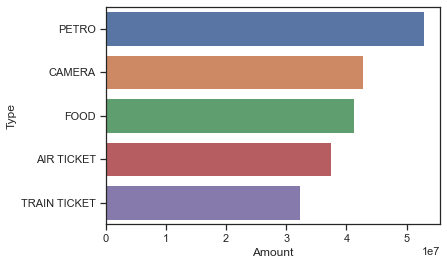

In [91]:
sns.barplot(y=a.Type,x=a.Amount)
plt.show()

In [92]:
# Top 5 Products by count

a = spend.pivot_table(index = 'Type',values = 'Customer',aggfunc= 'count').reset_index().sort_values(by = 'Customer',ascending = False).head(5)
a

,Type,Customer
10,PETRO,200
4,CAMERA,160
7,FOOD,160
0,AIR TICKET,147
14,TRAIN TICKET,132


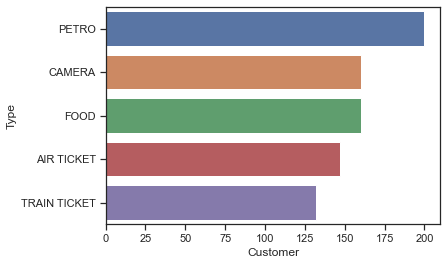

In [93]:
sns.barplot(y=a.Type,x=a.Customer)
plt.show()

### g. Which city is having maximum spend?

In [151]:
maxspend_city = semi_final_data.pivot_table(index = 'City',values = 'Amount',aggfunc='max').reset_index().sort_values(by='Amount',ascending = False)


In [152]:
maxspend_city

,City,Amount
4,COCHIN,499980.650083
1,BOMBAY,499889.614388
0,BANGALORE,499462.120788
2,CALCUTTA,497630.818904
5,DELHI,492705.496194
7,TRIVANDRUM,486154.680235
3,CHENNAI,483060.007753
6,PATNA,475309.325528


### h. Which age group is spending more money? 

In [98]:
#semi_final_data['Age Group'] = pd.cut(semi_final_data.Age,[0,2,16,30,45,100])

In [164]:
semi_final_data.loc[(semi_final_data.Age < 18),'Age_Group'] = 'Children'

In [165]:
semi_final_data.loc[(semi_final_data.Age >= 18) & (semi_final_data.Age < 30),'Age_Group'] = 'Youth'

In [166]:
semi_final_data.loc[(semi_final_data.Age >= 30) & (semi_final_data.Age < 60),'Age_Group'] = 'Adult'

In [167]:
semi_final_data.loc[(semi_final_data.Age > 60) ,'Age_Group'] = 'Senior'

In [168]:
age_group_data = semi_final_data.pivot_table(index = 'Age_Group',values = 'Amount',aggfunc= 'sum').reset_index()

In [169]:
age_group_data.sort_values(by = 'Amount',ascending = False)

,Age_Group,Amount
2,Senior,8.764517e+07
0,Adult,8.343892e+07
1,Children,3.425200e+07
3,Youth,2.339250e+07


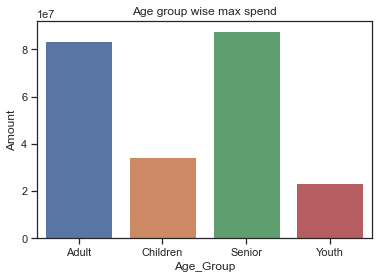

In [177]:
sns.barplot(data= age_group_data,x='Age_Group',y='Amount')
plt.title("Age group wise max spend")
plt.show()

### i. Who are the top 10 customers in terms of repayment?

In [132]:
top_repayment = repayment.pivot_table(index = 'Customer',values = 'Amount',aggfunc= sum)

In [172]:
top_rp = top_repayment.reset_index().sort_values(by='Amount',ascending = False).head(10)

In [173]:
top_rp

,Customer,Amount
58,A61,9.672794e+06
57,A60,9.168150e+06
37,A42,8.928473e+06
5,A13,8.496396e+06
15,A22,8.270518e+06
32,A38,8.205337e+06
38,A43,7.976031e+06
35,A40,7.671796e+06
14,A21,7.666291e+06
6,A14,7.655255e+06


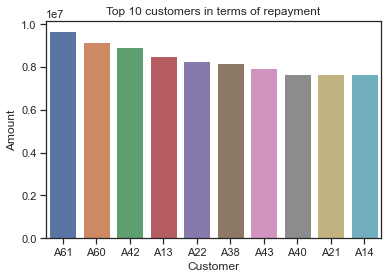

In [178]:
sns.barplot(data= top_rp,x ='Customer',y='Amount' )
plt.title('Top 10 customers in terms of repayment')
plt.show()

### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same

In [114]:
semi_final_data['Years'] = semi_final_data.Month.dt.strftime("%Y")

In [134]:
city_wise_spend = semi_final_data.pivot_table(index = 'City',columns = ['Product','Years'],values = 'Amount',aggfunc= sum)
city_wise_spend

Product             Gold                                  Platimum  \
Years               2004          2005          2006          2004   
City                                                                 
BANGALORE   9.870697e+06  1.491447e+07  1.312135e+07  1.045046e+06   
BOMBAY      6.221750e+06  9.533804e+06  1.019603e+07  9.469763e+05   
CALCUTTA    8.643979e+06  1.169198e+07  9.571088e+06  2.178863e+06   
CHENNAI     1.415073e+06  3.013081e+06  3.057966e+06  2.944115e+06   
COCHIN      9.730435e+06  1.102531e+07  1.262828e+07  2.974235e+06   
DELHI       3.467979e+06  2.508487e+06  3.535700e+06  3.388421e+05   
PATNA       1.915473e+06  2.187692e+06  2.424509e+06  8.166373e+05   
TRIVANDRUM  2.272700e+06  1.984571e+06  2.827397e+06  1.770528e+06   

Product                                       Silver                 \
Years               2005          2006          2004           2005   
City                                                                  
BANGALORE   8.857226e+05  7.096945e+05  1.215575e+06  909077.886127   
BOMBAY      8.360085e+05  1.022214e+06  5.186763e+05  572757.221051   
CALCUTTA    4.822990e+06  2.456412e+06  5.974884e+05  343259.508423   
CHENNAI     5.243051e+06  6.066896e+06  3.087747e+05  428758.513457   
COCHIN      4.151463e+06  5.530969e+06  7.891949e+05  643789.217230   
DELHI       4.436198e+05  1.333650e+05  8.040971e+05  493446.154834   
PATNA       2.534969e+06  7.453814e+05  8.448295e+05  949455.256917   
TRIVANDRUM  3.401179e+06  2.122722e+06  2.729088e+05  372614.285714   

Product                   
Years               2006  
City                      
BANGALORE   1.650719e+06  
BOMBAY      8.494748e+05  
CALCUTTA    8.761541e+05  
CHENNAI     3.133881e+05  
COCHIN      1.100866e+06  
DELHI       7.607706e+05  
PATNA       6.972589e+05  
TRIVANDRUM  5.335627e+05

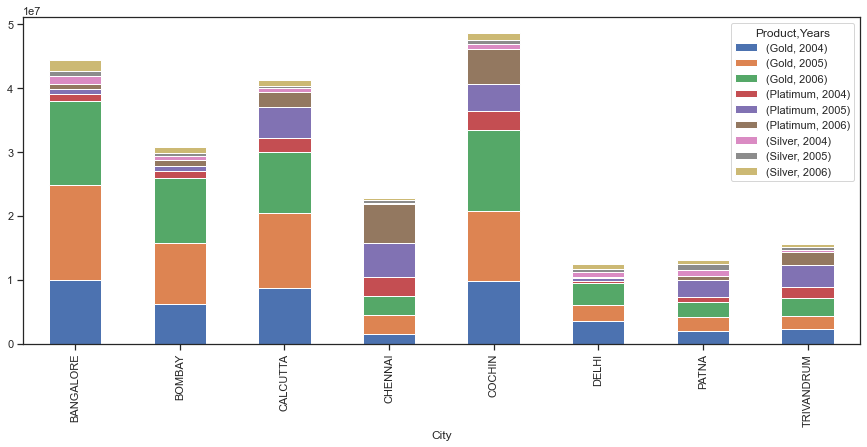

In [135]:
city_wise_spend.plot(kind = 'bar',stacked = True,figsize = (15,6))

plt.show()

## 4. Create graphs for

### a. Monthly comparison of total spends, city wise

In [117]:
semi_final_data['Months'] = semi_final_data.Month.dt.strftime("%B")

In [118]:
comp = semi_final_data.pivot_table(index = 'Months',columns = "City",values = 'Amount',aggfunc = 'sum')

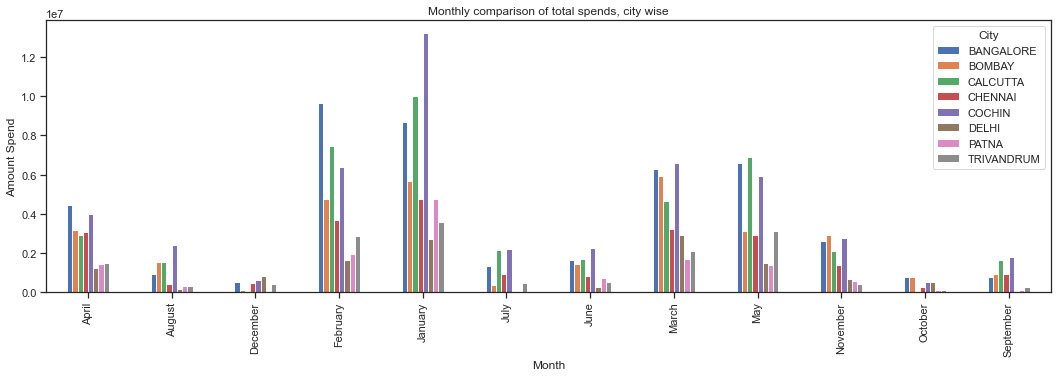

In [180]:
comp.plot(kind='bar',figsize = (18,5))
plt.xlabel("Month")
plt.ylabel("Amount Spend")
plt.title("Monthly comparison of total spends, city wise")
plt.show()

### b. Comparison of yearly spend on air tickets

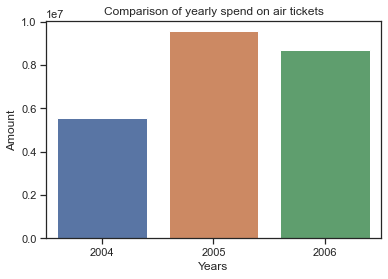

In [185]:
air_ticket = semi_final_data[semi_final_data.Type=='AIR TICKET'].pivot_table(index = 'Years',values = 'Amount',aggfunc= sum).reset_index()
sns.barplot(data=air_ticket,x='Years',y='Amount')
plt.title('Comparison of yearly spend on air tickets')
plt.show()

### c. Comparison of monthly spend for each product (look for any seasonality     that exists in terms of spend)


In [121]:
# 2005 Data

sd =  semi_final_data[(semi_final_data.Month.dt.year > 2004) & (semi_final_data.Month.dt.year < 2006)]

In [136]:
monthly_spend_d = sd.pivot_table(index = 'Months',columns = 'Product',values='Amount',aggfunc=sum)

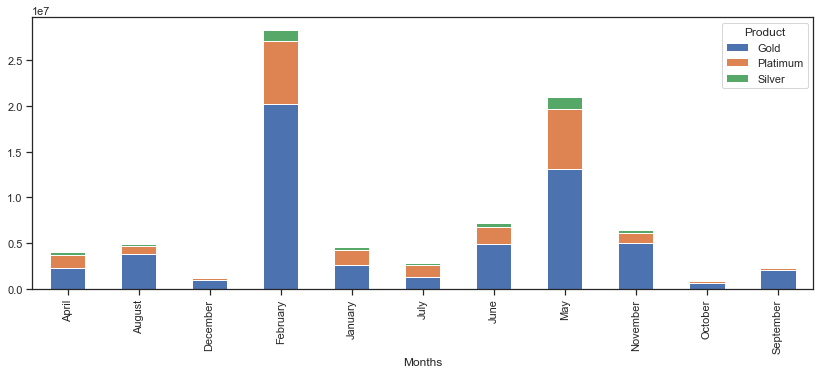

In [137]:
monthly_spend_d.plot(kind='bar',stacked = True,figsize=(14,5))
plt.show()

### 5. Write user defined PYTHON function to perform the following analysis: 

### You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.


In [124]:
def summary_report(data,**kwargs):
    print('Give the product name and timeperiod for which you want the data')
    for key in kwargs.keys():
        if key == 'product' :
            c = data[data.Product == kwargs['product']]
    for keys in kwargs.keys():
        if keys == 'timeperiod':
            r = c.pivot_table(index = ('City','Customer'),columns = [kwargs['timeperiod']],values = 'Amount_Repayment',aggfunc=sum).fillna("No Repayment")
            return r


In [127]:
print("Products are : ",set(final_data.Product))
print("Time period : {Months, Years}")
summary_report(final_data,product = input("Enter a product name"),timeperiod = input("Enter timeperiod"))

Products are :  {'Gold', 'Platimum', 'Silver'}
Time period : {Months, Years}
Enter a product namePlatimum
Enter timeperiodYears
Give the product name and timeperiod for which you want the data


Years                          2004            2005            2006
City       Customer                                                
BANGALORE  A19              50000.0         70000.0         80000.0
           A37        824179.130359  1055141.914174   999522.102977
           A5               70014.0         60012.0         40008.0
           A52        214150.462495   869538.712297        600012.0
BOMBAY     A33              20004.0         40008.0         80016.0
           A36        798216.137533   938528.613092   977872.830355
           A4               30003.0         40004.0         40004.0
           A51        462511.062232   351144.223427    593056.03195
           A70         No Repayment         20002.0    No Repayment
           A71              10002.0         10002.0    No Repayment
CALCUTTA   A20              70007.0         60006.0         70007.0
           A34             100000.0   448634.804912   799773.297965
           A40       3656725.572807  2286497.612068  1728572.598171
           A49             100020.0   123201.542179         80016.0
           A69         No Repayment         10000.0         10000.0
           A98              10001.0    No Repayment    No Repayment
           A99              10002.0    No Repayment    No Repayment
CHENNAI    A38       2528687.494326  2751601.978166  2925047.031916
           A47              60000.0        160000.0         90000.0
           A56        365715.327415  1639756.138977  2645769.404734
COCHIN     A21             110022.0        140028.0    75233.966213
           A3               30000.0         50000.0         30000.0
           A35             100001.0   414346.030244   703975.421766
           A41       2044269.560462   2723125.90817  2418166.137598
           A50             400000.0    473512.63329    815797.54841
           A54         38402.140382  2057929.200376   2553450.56484
           A83         No Repayment    No Repayment         10002.0
DELHI      A53        573785.076047   648881.635695    401191.96103
PATNA      A55        444463.831072   680366.593789  3401948.101769
TRIVANDRUM A39       1213123.499203  3914632.149602  1763694.446299
           A48              70007.0        140014.0        100010.0
           A97              10000.0    No Repayment    No Repayment